In [4]:
import pandas as pd
prices = pd.read_csv('W1S1 data/sample_prices.csv')
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [7]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [8]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [9]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()
volatility = variance**0.5
#or
import numpy as np
volatility2 = np.sqrt(variance)
print(volatility)
print(volatility2)

BLUE      0.022957
ORANGE    0.076212
dtype: float64
BLUE      0.022957
ORANGE    0.076212
dtype: float64


In [13]:
#Not the same numbers ! because the method .std divides by N-1 instead of N. (Sample vs Population)
number_of_obs = returns.shape[0]
variance = squared_deviations.sum()/(number_of_obs - 1)
volatility = variance**0.5
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [16]:
#Annualize a monthly data
ann_volatility = returns.std()*np.sqrt(12)
#or
ann_volatility2 = returns.std()*12**0.5
print(ann_volatility)
print(ann_volatility2)

BLUE      0.083060
ORANGE    0.275747
dtype: float64
BLUE      0.083060
ORANGE    0.275747
dtype: float64


In [19]:
returns = pd.read_csv('W1S1 data/Portfolios_Formed_on_ME_monthly_EW.csv',
                     header = 0, index_col = 0, parse_dates = True, na_values = -99.99)
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [21]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [22]:
returns = returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [23]:
returns.columns = ['SmallCap', 'LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

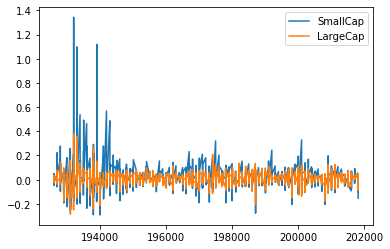

In [24]:
returns.plot.line()

In [25]:
#Small Cap is much more volatile. But volatile in a good way since its on the positive side
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [26]:
ann_vol = returns.std()*12**0.5
ann_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [29]:
n_months = returns.shape[0]
#Monthly return is simply the total return to the power of 1/number of months.
return_per_month = (returns + 1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [31]:
ann_return = (return_per_month + 1)**12 - 1
print(ann_return)
#or everything in one line
ann_return2 = (returns + 1).prod()**(12/n_months) - 1
print(ann_return2)

SmallCap    0.167463
LargeCap    0.092810
dtype: float64
SmallCap    0.167463
LargeCap    0.092810
dtype: float64


In [33]:
#Let's assume a Risk Free rate of 3%
rf = 0.03
excess_return = ann_return - rf
sharpe_ratio = excess_return/ann_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

In [35]:
import edhec_risk_kit as erk

In [36]:
erk.return_monthly(returns)

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [37]:
erk.return_monthly(returns, annualized = True)

SmallCap    0.167463
LargeCap    0.092810
dtype: float64